## Isoaltion Forest Anamoly Detection

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest    
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#anamoly score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [30]:
# Load the dataset

df = pd.read_csv('healthcare.csv')
df.head()

,0,1
0,1.616671,1.944522
1,1.256461,1.609444
2,-2.343919,4.392961
3,1.195393,2.794485
4,-3.329586,5.303160


In [31]:
df.describe()

,0,1
count,250.000000,250.000000
mean,0.126630,2.957091
std,2.704501,2.463476
min,-5.888766,-5.409809
25%,-2.067694,1.394351
50%,0.413196,2.810804
75%,1.705562,4.977583
max,9.399157,9.548513


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       250 non-null    float64
 1   1       250 non-null    float64
dtypes: float64(2)
memory usage: 4.0 KB


In [33]:
# Check for missing values

df.isnull().sum()

0    0
1    0
dtype: int64

In [34]:
# Drop the missing values
#df.dropna(inplace=True)


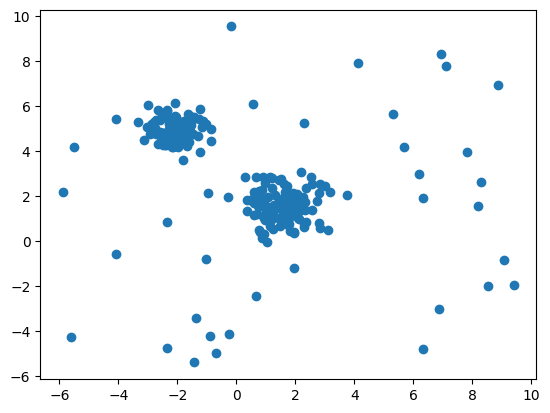

In [35]:
## scatter plot of the data

plt.scatter(df.iloc[:,0],df.iloc[:,1])

##iloc is used to select the columns
## iloc and loc difference : iloc is used to select the columns by index and loc is used to select the columns by name

In [36]:
from sklearn.ensemble import IsolationForest

In [37]:
## making the model

modell = IsolationForest(contamination= 'auto')
#contamination is the threshold value to decide the anamoly
#we can select it manually or we can use auto
#auto will decide the threshold value automatically

In [38]:
modell

IsolationForest()

In [39]:
## fitting the model
modell.fit(df)

IsolationForest()

In [40]:
pred = modell.predict(df)

In [41]:
pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1

In [42]:
## making index of the anamolies

anamoly_index = np.where(pred <0 )
anamoly_index

(array([ 20,  24,  45,  48,  53,  55,  63,  72,  74,  78,  83,  85,  87,
         92,  97, 108, 114, 119, 130, 133, 141, 151, 167, 179, 187, 199,
        212, 217, 220, 221, 227, 242, 247, 248], dtype=int64),)

In [44]:

# converting the data frame into array

df_array = df.values

#because we can't use the data frame in the scatter plot

In [45]:
df_array

array([[ 1.61667145,  1.94452201],
       [ 1.2564615 ,  1.60944428],
       [-2.34391881,  4.3929613 ],
       [ 1.19539251,  2.79448461],
       [-3.32958612,  5.30315976],
       [ 1.6241983 ,  1.21875334],
       [ 0.45611969,  1.80757419],
       [ 0.62304325,  2.04424325],
       [-2.05908202,  4.6599109 ],
       [ 2.16307638,  1.39149293],
       [-2.13386677,  4.43599433],
       [-1.65311342,  4.92021328],
       [ 0.75047316,  2.23811621],
       [-1.71073925,  5.17482723],
       [ 0.86102444,  2.2819114 ],
       [-1.86274182,  4.55454246],
       [ 1.48027244,  1.79983231],
       [ 1.45223088,  2.69933991],
       [-1.65509092,  5.65092311],
       [ 1.22887123,  1.28838807],
       [ 9.39915672, -1.97148327],
       [ 2.04025339,  2.07645291],
       [ 0.890442  ,  1.09480523],
       [-2.35235014,  5.47163036],
       [ 0.56612677,  6.08881822],
       [-2.38207196,  4.28110426],
       [-2.57809122,  5.39059905],
       [-1.92902342,  4.84033579],
       [-2.40668213,

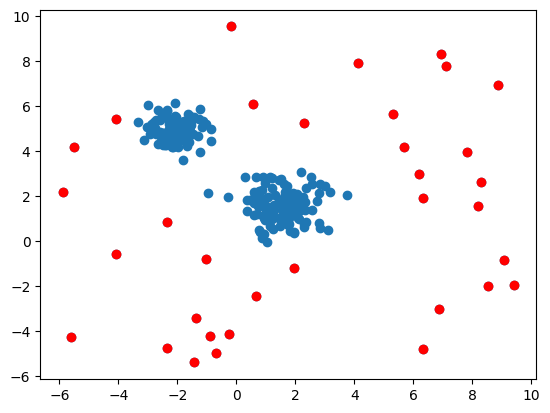

In [51]:
## scatter plot of the data
anamoly_index = np.where(pred <0 )
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(df_array[anamoly_index,0],df_array[anamoly_index,1],color='r')